# Scalability Model (Storage Targets)

__23/06/2021__

## Storage Targets Test #01

- 8 computing nodes
- 8 clients (processes) per node.
- 1 storage target.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts

# df = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# Re-execution

__15/07/2021__

In [2]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')

In [3]:
# t0 = dft['ctime'][0]
# dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [4]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]


In [5]:
t0 = df['end'][0]
# t1 = df['end'][1]
df['end'] = df['end'].apply(lambda x: (x - t0).seconds)

In [6]:
dk = df[:]

x = dk['end'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))



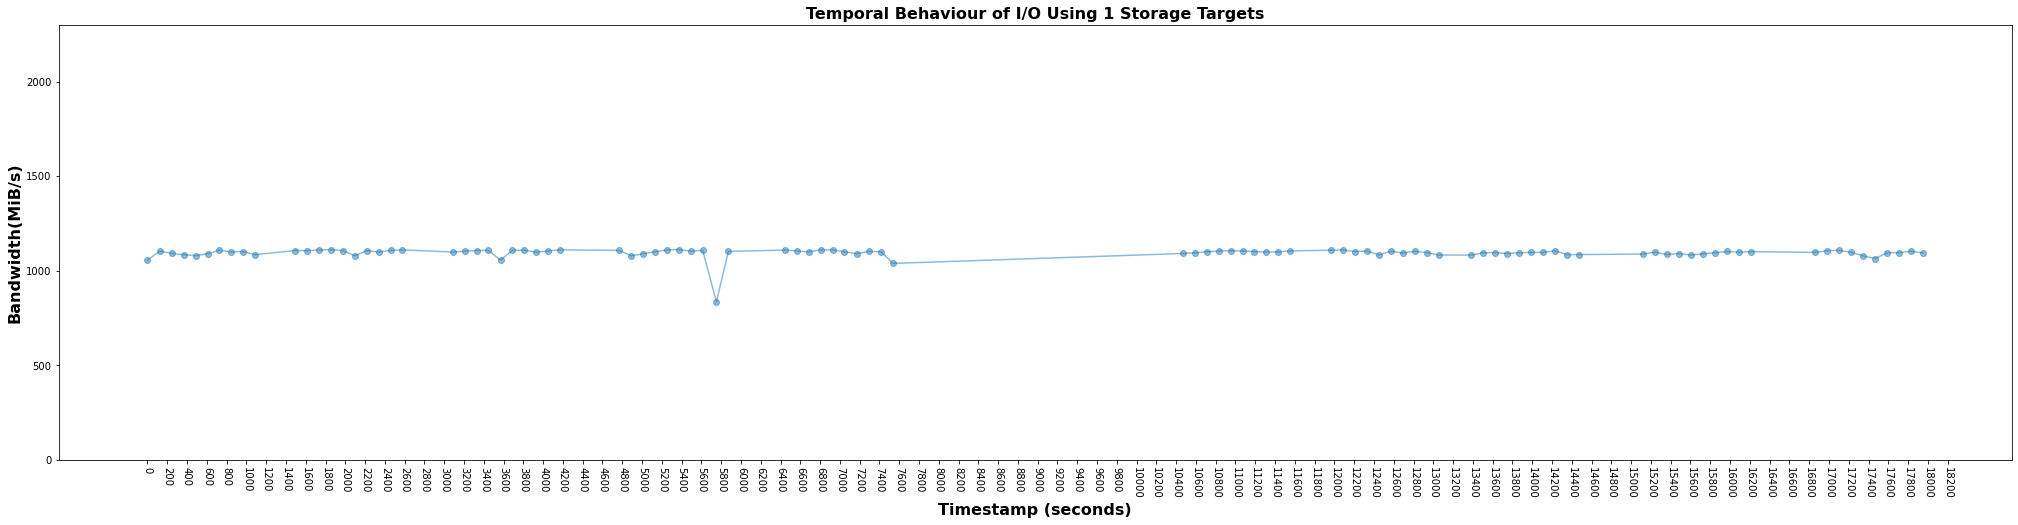

In [7]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math



fig, ax = plt.subplots()

fig.set_size_inches(35.0, 8, forward=True)

plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 18400, 200))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title("Temporal Behaviour of I/O Using 1 Storage Targets", fontweight ='bold', fontsize=16)

plt.ylim([0, 2300])


# plt.grid()
# fig.savefig('../graph/1st.pdf', format='pdf', dpi=1200)  
plt.show()

In [8]:
g_columns = ['target1']
gb = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
gb.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
gb = gb.reset_index()
gb

target1  bw_count      bw_mean   bw_min   bw_max
0     102        34  1095.663824  1056.32  1111.32
1     103        19  1092.452105  1039.38  1110.74
2     104         6  1102.748333  1091.75  1112.21
3     202        22  1088.748636   836.49  1111.23
4     203        12  1102.022500  1089.93  1110.93
5     204         7  1101.548571  1085.57  1112.03

In [9]:
df0 = df.loc[ (df['target1'] == '102')]
df1 = df.loc[ (df['target1'] == '103')]
df2 = df.loc[ (df['target1'] == '104')]
df3 = df.loc[ (df['target1'] == '202')]
df4 = df.loc[ (df['target1'] == '203')]
df5 = df.loc[ (df['target1'] == '204')]


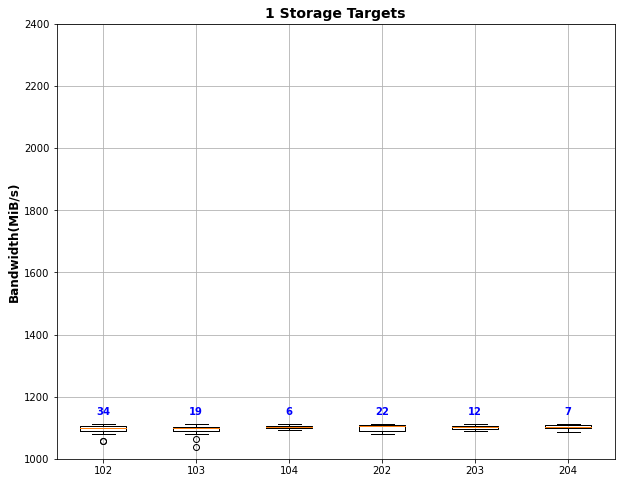

In [10]:
n_targets = 1


xlabels = ['102',
           '103',
           '104',
           '202',
           '203',
           '204']

dframes = [df0,
           df1,
           df2,
           df3,
           df4,
           df5]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=0.0,
            dframes=dframes,
           plot_obs=True)


